In [6]:
import numpy as np

X = np.random.choice(np.linspace(0, 20, 10000), size=10, replace=False).reshape(-1, 1)
y = np.sin(X) + np.random.normal(scale=0.3, size=X.shape)

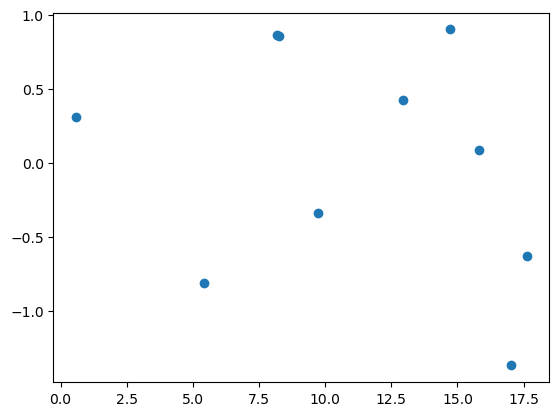

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y)

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

kernel = 1.0 * RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0)

In [10]:
gpr.fit(X, y)

/home/mori/miniforge3/envs/tmap/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(alpha=0,
                         kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1))

In [19]:
X_pred = np.linspace(0, 20, 100).reshape(-1, 1)
y_pred_mean, y_pred_std = gpr.predict(X_pred, return_std=True)

Text(0, 0.5, 'y')

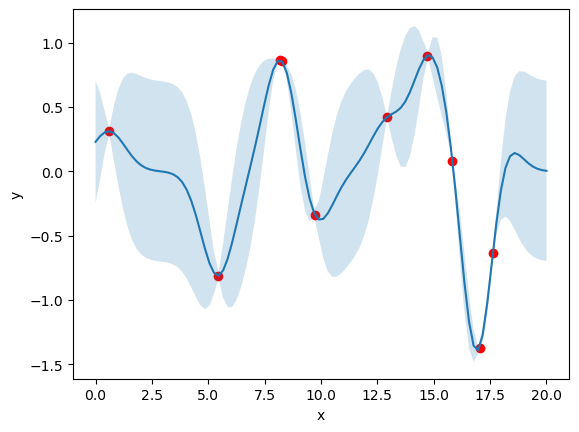

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y, color="red")
ax.plot(X_pred, y_pred_mean)
ax.fill_between(
    X_pred.flatten(),
    y1=y_pred_mean - y_pred_std,
    y2=y_pred_mean + y_pred_std,
    alpha=0.2,
)
ax.set_xlabel("x")
ax.set_ylabel("y")

In [67]:
from scipy.stats import norm
from scipy.optimize import minimize


def expected_improvement(y_mean, y_std, y_best, xi=0.01, direction="minimize"):
    with np.errstate(divide="warn"):
        if direction == "maximize":
            imp = y_mean - y_best - xi
        elif direction == "minimize":
            imp = y_best - y_mean - xi

        Z = imp / y_std
        ei = imp * norm.cdf(Z) + y_std * norm.pdf(Z)
        ei[y_std == 0.0] = 0.0

    return ei


def upper_confidence_bound(mu, sigma, beta=2.0):
    return mu - beta * sigma


def probability_of_improvement(y_mean, y_std, y_best, xi=0.01, direction="minimize"):
    with np.errstate(divide="warn"):
        if direction == "maximize":
            imp = y_mean - y_best - xi
        elif direction == "minimize":
            imp = y_best - y_mean - xi

        Z = imp / y_std
        pi = norm.cdf(Z)
        pi[y_std == 0.0] = 0.0

    return pi

In [68]:
ei = expected_improvement(y_pred_mean, y_pred_std, y.max(), direction="maximize")
pi = probability_of_improvement(y_pred_mean, y_pred_std, y.max(), direction="maximize")
ucb = upper_confidence_bound(y_pred_mean, y_pred_std)

Text(0.5, 1.0, 'PI')

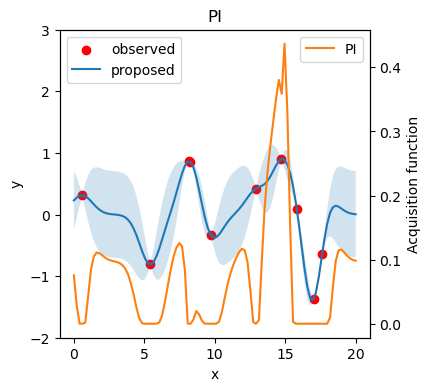

In [70]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.scatter(X, y, color="red", label="observed")
ax.plot(X_pred, y_pred_mean, label="proposed")
ax.fill_between(
    X_pred.flatten(),
    y1=y_pred_mean - y_pred_std,
    y2=y_pred_mean + y_pred_std,
    alpha=0.2,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim(-2, 3)
ax2 = ax.twinx()
ax2.plot(X_pred, pi, color="tab:orange", label="PI")
ax2.set_ylabel("Acquisition function")
ax.legend(loc="upper left")
ax2.legend()
ax.set_title("PI")

Text(0.5, 1.0, 'EI')

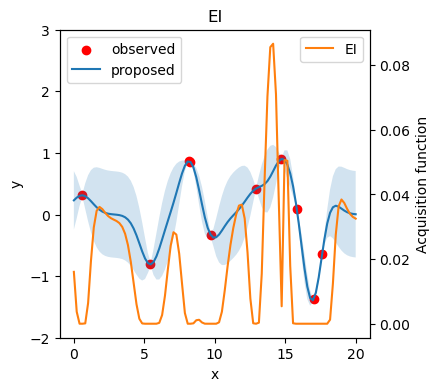

In [64]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.scatter(X, y, color="red", label="observed")
ax.plot(X_pred, y_pred_mean, label="proposed")
ax.fill_between(
    X_pred.flatten(),
    y1=y_pred_mean - y_pred_std,
    y2=y_pred_mean + y_pred_std,
    alpha=0.2,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim(-2, 3)
ax2 = ax.twinx()
ax2.plot(X_pred, ei, color="tab:orange", label="EI")
ax2.set_ylabel("Acquisition function")
ax.legend(loc="upper left")
ax2.legend()
ax.set_title("EI")

Text(0.5, 1.0, 'UCB ($k=2$)')

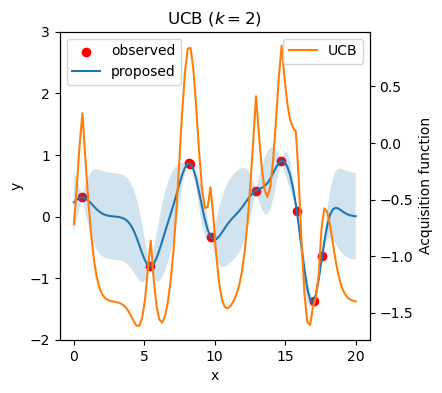

In [71]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.scatter(X, y, color="red", label="observed")
ax.plot(X_pred, y_pred_mean, label="proposed")
ax.fill_between(
    X_pred.flatten(),
    y1=y_pred_mean - y_pred_std,
    y2=y_pred_mean + y_pred_std,
    alpha=0.2,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim(-2, 3)
ax2 = ax.twinx()
ax2.plot(X_pred, ucb, color="tab:orange", label=r"UCB")
ax2.set_ylabel("Acquisition function")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
ax.set_title(r"UCB ($k=2$)")